In [2]:
using Plots;
include("1DHermite.jl");

In [3]:
m = 1.;
c = 10.;
k = 10000.;

x0 = 10.;
v0 = 0.;

dt = 0.02;
time = 1.;
t = collect(0:dt:time);
FN = 5.;
f = 10;

function Fexternal(tau)
    return FN*sin(2*pi*f*tau);
end

x, x_ = Hermite1D_ODE2_Simpson(t, Fexternal, x0, v0, m, c, k);

tm, xm, x_m = Hermite1D_ODE2_Interpolation(t, x, x_);

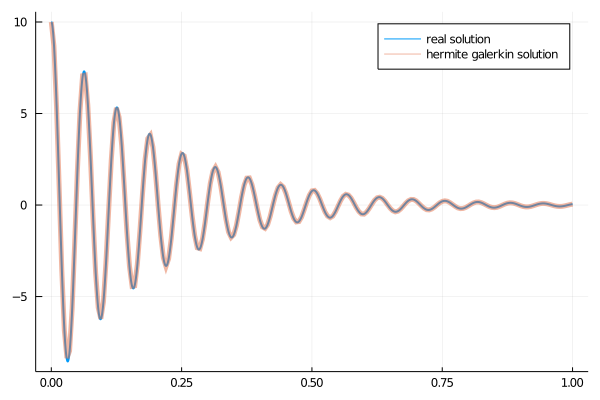

In [6]:
function RealSolution_(t)
    return 0.0513551*cos(62.8319*t) + 0.00533155*sin(62.8319*t) + exp(-5*t)*(-0.0513551*cos(99.8749*t) - 1001.26*sin(99.8749*t));
end

function RealSolution(t)
    return -0.0000848542*cos(62.8319*t) + 10.0001*exp(-5*t)*cos(99.8749*t) + 0.000817342*sin(62.8319*t) + 0.500116*exp(-5*t)*sin(99.8749*t);
end

treal = collect(0:dt/100:time);
xreal = RealSolution.(treal);
xreal_ = RealSolution_.(treal);

plot(treal, xreal, label="real solution", lw=2)
plot!(tm, xm, label="hermite galerkin solution", lw=5, alpha=0.5)